In [21]:
import pandas as pd
import numpy as np

from scipy.signal import savgol_filter

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 75

In [26]:
df = pd.read_csv('data/RAW_A9_03/a9_03_clean.csv', header=None)

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,511,511,511,511,199,511,511,511,511,199,...,511,511,511,199,511,511,511,511,199,nothing
1,511,199,332,511,511,511,194,194,511,511,...,199,510,511,511,511,198,201,511,511,nothing
2,511,511,199,511,511,511,511,198,261,511,...,210,195,511,511,511,511,199,511,511,nothing
3,199,251,511,511,511,201,195,511,511,511,...,511,511,511,511,198,199,511,511,511,nothing
4,511,511,511,511,199,511,511,511,511,199,...,511,511,511,198,511,511,511,511,199,touching
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,511,197,254,511,511,511,300,194,511,511,...,198,197,511,511,511,198,198,291,511,touching
163,511,511,511,450,198,511,511,511,511,198,...,511,511,196,195,511,511,511,511,198,touching
164,194,198,192,511,511,511,198,195,511,511,...,198,198,511,511,511,198,198,198,511,touching
165,511,511,511,511,511,511,511,511,511,511,...,511,511,198,198,198,511,511,198,198,touching


In [28]:
df_n = df[df.iloc[:, -1]=='nothing']
df_p = df[df.iloc[:, -1]=='passing']
df_t = df[df.iloc[:, -1]=='touching']

# df_n.reset_index(drop=True, inplace=True)
# df_p.reset_index(drop=True, inplace=True)
# df_t.reset_index(drop=True, inplace=True)

Total: 17
============== Row:072 ============== (L:passing)


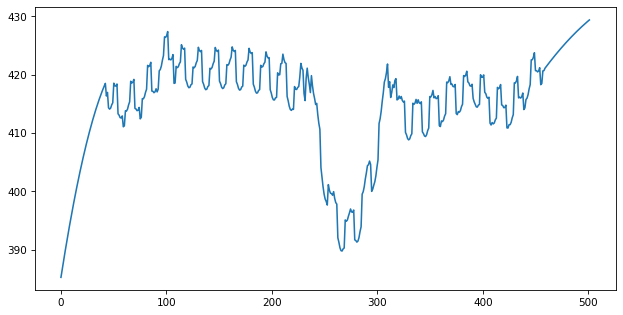

============== Row:076 ============== (L:passing)


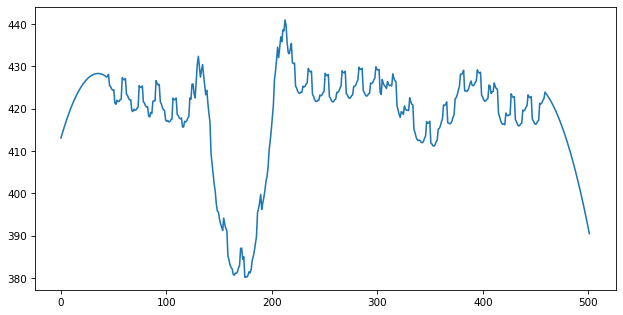

============== Row:077 ============== (L:passing)


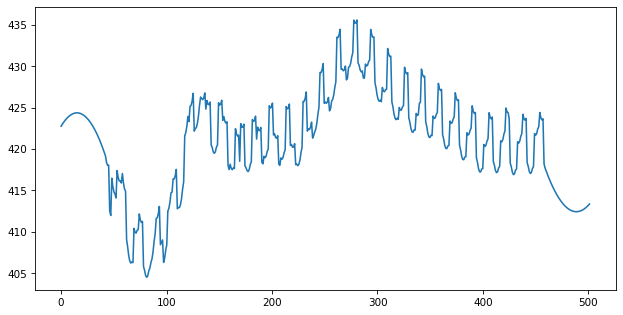

============== Row:078 ============== (L:passing)


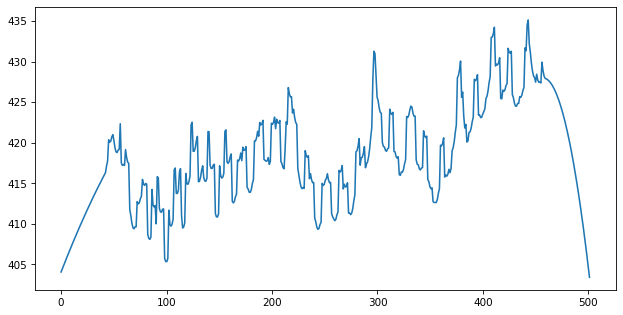

============== Row:079 ============== (L:passing)


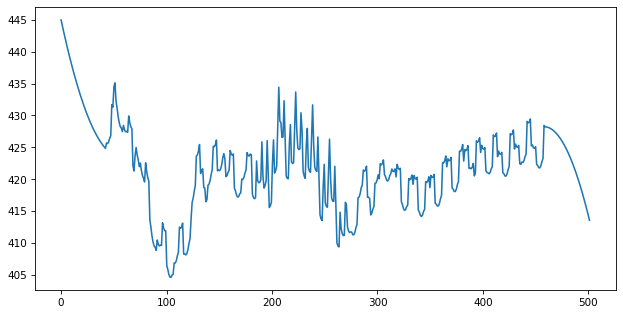

============== Row:080 ============== (L:passing)


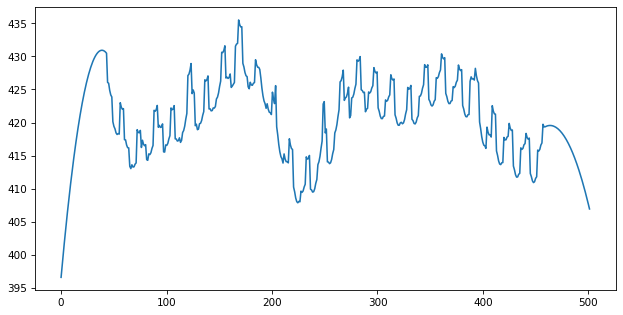

============== Row:081 ============== (L:passing)


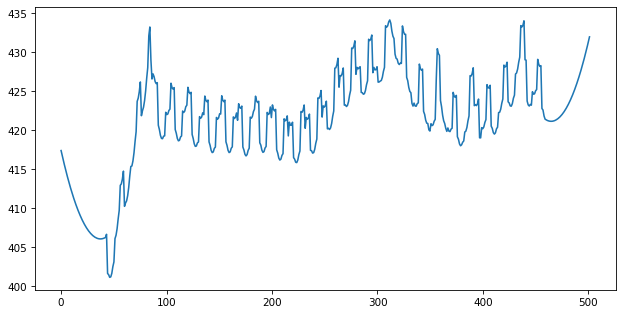

============== Row:082 ============== (L:passing)


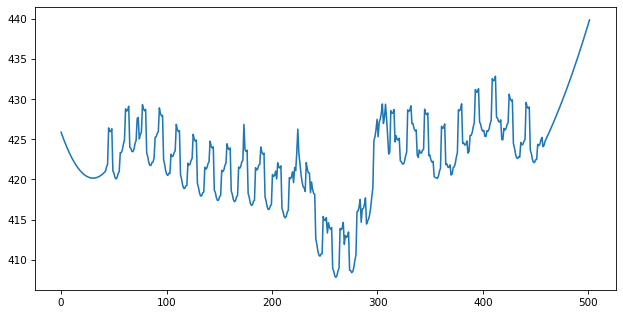

============== Row:083 ============== (L:passing)


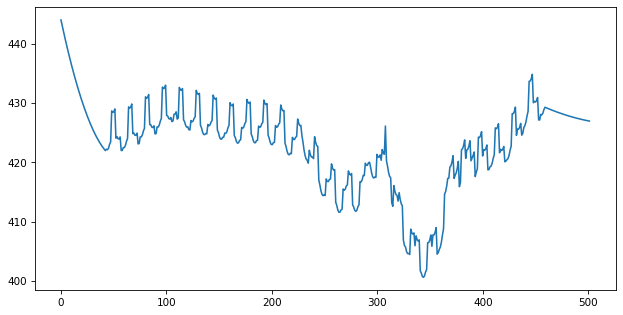

============== Row:084 ============== (L:passing)


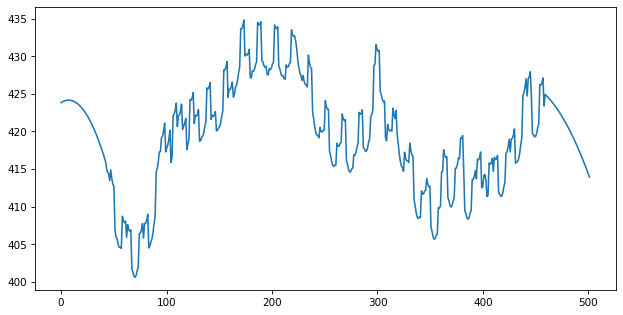

============== Row:093 ============== (L:passing)


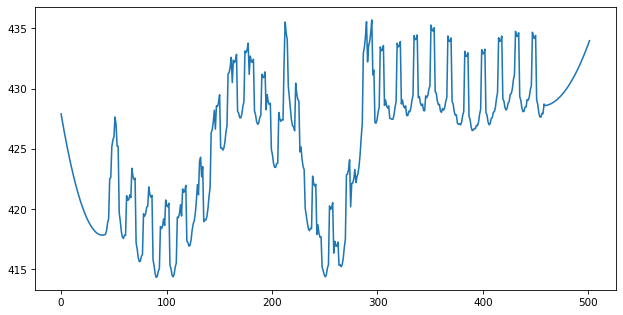

============== Row:094 ============== (L:passing)


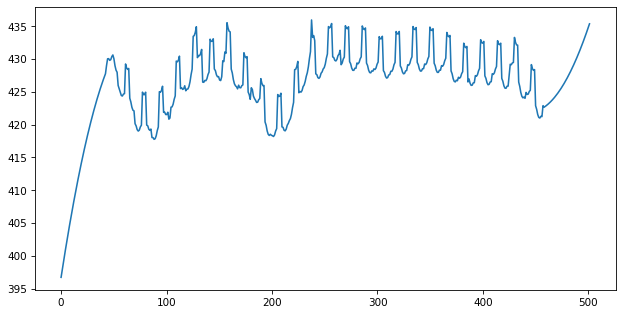

============== Row:133 ============== (L:passing)


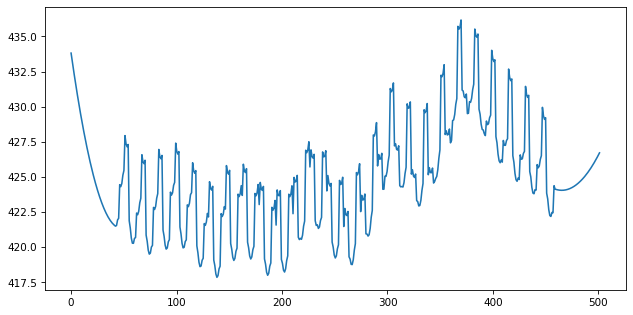

============== Row:135 ============== (L:passing)


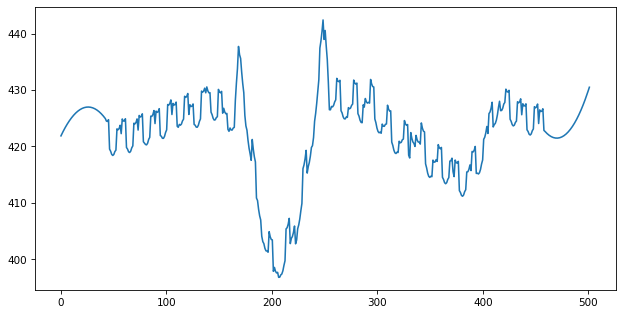

============== Row:136 ============== (L:passing)


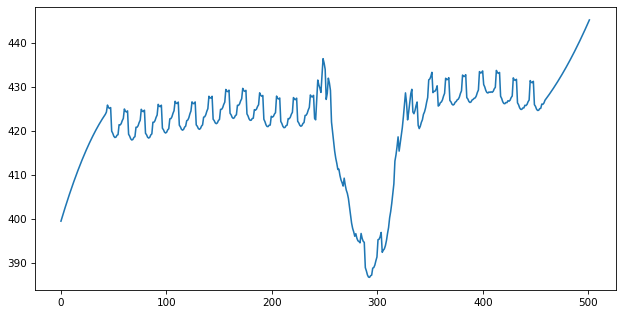

============== Row:137 ============== (L:passing)


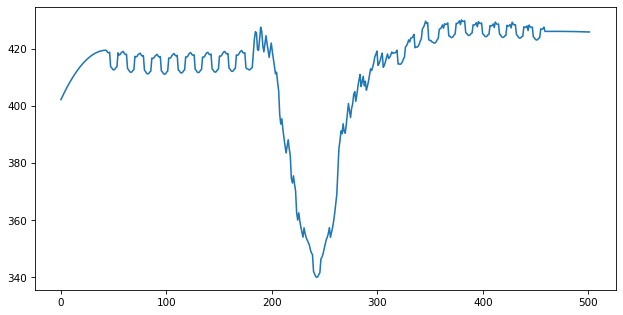

============== Row:138 ============== (L:passing)


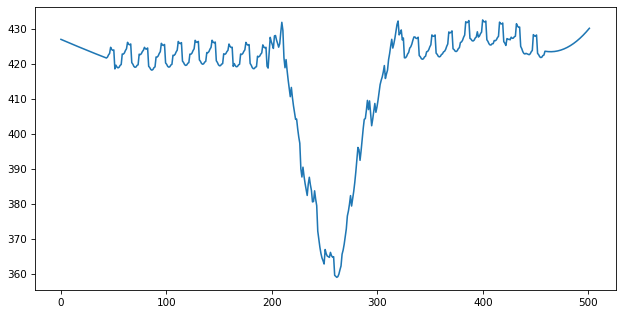

In [35]:
target_df = df_p

target = target_df.iloc[:, :-1]
x = np.linspace(0, len(df.iloc[0]) - 1, len(df.iloc[0]) - 1)
print("Total:", len(target_df))
for i in target_df.index:
    print("============== Row:{:03d} ============== (L:{})".format(i, df.iloc[i, -1]))
    y = df.iloc[i, :-1]
    y = savgol_filter(y, 85, 2)
    plt.plot(x, y)
    plt.show()

============== Row:000 ============== (L:nothing)


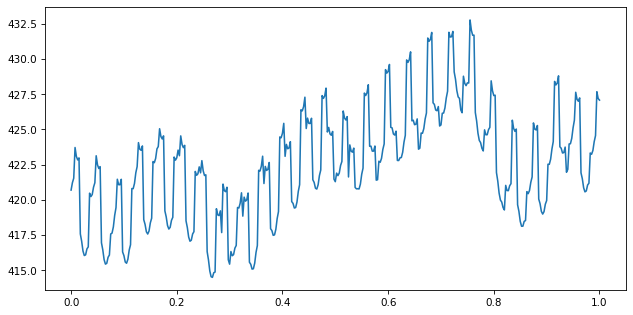

============== Row:001 ============== (L:nothing)


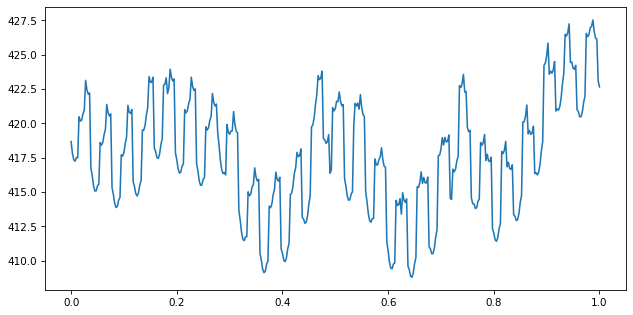

============== Row:002 ============== (L:nothing)


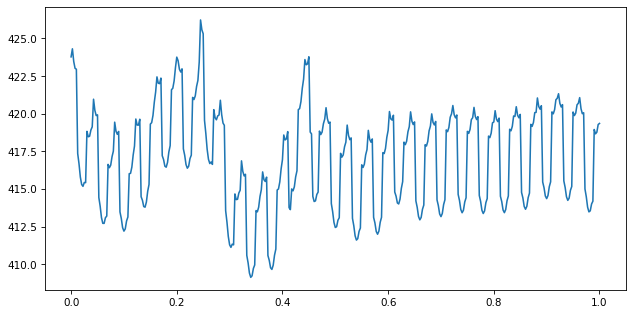

In [30]:
# savgol去頭去尾
target_df = df

target = target_df.iloc[:, :-1]
x = np.linspace(0, 1, len(target.iloc[0])-100)
for i in range(3):
    print("============== Row:{:03d} ============== (L:{})".format(i, target_df.iloc[i, -1]))
    y = target.iloc[i]
    y = savgol_filter(y, 85, 2)
    y = y[50:-50]
    plt.plot(x, y)
    plt.show()